In [1]:
#importing SBopen class from mplsoccer to open the data
from mplsoccer import Sbopen, Pitch, VerticalPitch

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import unicodedata
import re
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

/Users/jedrzejsarna/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
def get_country_events(country_name):
    """
    This function filters the matches involving a specific country and concatenates event DataFrames
    for those matches into a single DataFrame. It opens the necessary data using the SBopen parser.

    Parameters:
    - country_name: The name of the country to filter matches by.

    Returns:
    - df_country_events: A concatenated DataFrame of events for the specified country's matches.
    """
    
    # Initialize the parser
    parser = Sbopen()

    # Open the competition and match data
    df_competition = parser.competition()
    df_euros = parser.match(competition_id=55, season_id=282)

    # Filter matches where the country is either the home or away team
    df_country_matches = df_euros[(df_euros['home_team_country_name'] == country_name) | 
                                  (df_euros['away_team_country_name'] == country_name)]

    # Get unique match IDs for the filtered matches
    country_match_ids = df_country_matches['match_id'].unique()

    # Initialize a list to store event DataFrames
    dfs_country_events = []

    # Loop through each match ID and get event DataFrames
    for match_id in country_match_ids:
        df_event, df_related, df_freeze, df_tactics = parser.event(match_id)
        dfs_country_events.append(df_event)

    # Concatenate all event DataFrames into one
    df_country_events = pd.concat(dfs_country_events, ignore_index=True)

    return df_country_events

In [4]:
def get_player_events(country_name, player_name):
    """
    This function filters the matches involving a specific country and a specific player,
    and concatenates event DataFrames for those matches into a single DataFrame.

    Parameters:
    - country_name: The name of the country to filter matches by.
    - player_name: The name of the player to filter events by.

    Returns:
    - df_player_events: A DataFrame containing the events for the specified player in the filtered matches.
    """
    
    # Initialize the parser
    parser = Sbopen()

    # Open the competition and match data
    df_competition = parser.competition()
    df_euros = parser.match(competition_id=55, season_id=282)

    # Filter matches where the country is either the home or away team
    df_country_matches = df_euros[(df_euros['home_team_country_name'] == country_name) | 
                                  (df_euros['away_team_country_name'] == country_name)]

    # Get unique match IDs for the filtered matches
    country_match_ids = df_country_matches['match_id'].unique()

    # Initialize a list to store event DataFrames
    dfs_country_events = []

    # Loop through each match ID and get event DataFrames
    for match_id in country_match_ids:
        df_event, df_related, df_freeze, df_tactics = parser.event(match_id)
        dfs_country_events.append(df_event)

    # Concatenate all event DataFrames into one
    df_country_events = pd.concat(dfs_country_events, ignore_index=True)

    # Filter the events DataFrame for the specified player
    df_player_events = df_country_events[df_country_events['player_name'] == player_name]

    return df_player_events

In [5]:
df_netherlands_events = get_country_events('Netherlands')
df_netherlands_events.shape

(20176, 82)

In [6]:
# Example usage for 'Netherlands' and player 'Cody Mathès Gakpo'
gakpo_events = get_player_events('Netherlands', 'Cody Mathès Gakpo')

In [7]:
gakpo_events['position_name'].value_counts()   

position_name
Left Wing        646
Left Midfield      6
Name: count, dtype: int64

In [8]:
mbappe_events = get_player_events('France', 'Kylian Mbappé Lottin')

In [9]:
mbappe_events['position_name'].value_counts()

position_name
Left Wing              393
Center Forward         310
Left Center Forward    112
Name: count, dtype: int64

In [10]:
nico_events = get_player_events('Spain', 'Nicholas Williams Arthuer')

In [11]:
nico_events['position_name'].value_counts()

position_name
Left Wing    974
Name: count, dtype: int64

In [12]:
foden_events = get_player_events('England', 'Phil Foden')

In [13]:
foden_events['position_name'].value_counts()

position_name
Left Wing                    756
Right Attacking Midfield     427
Center Attacking Midfield    101
Right Defensive Midfield      30
Left Midfield                 13
Left Attacking Midfield       11
Name: count, dtype: int64

In [14]:
gakpo_events.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'under_pressure',
       'outcome_id', 'outcome_name', 'counterpress', 'off_camera',
       'foul_committed_advantage', 'foul_won_advantage', 'technique_id',
       'technique_name', 'shot_statsbomb_xg', 'end_z',
       'goalkeeper_position_id', 'goalkeeper_position_name', 'aerial_won',
       'pass_cross', 'out', 'pass_assisted_shot_id', 'pass_shot_assist',
       'shot_key_pass_id', 'foul_committed_penalty', 'foul_committe

In [15]:
test=gakpo_events[['player_name','period', 'timestamp','possession',
       'duration', 'match_id','type_name','play_pattern_name','outcome_name','technique_name', 'shot_statsbomb_xg']]

In [16]:
test.style.set_sticky().set_table_attributes('style="overflow:scroll;height:300px;"')


,player_name,period,timestamp,possession,duration,match_id,type_name,play_pattern_name,outcome_name,technique_name,shot_statsbomb_xg
17,Cody Mathès Gakpo,1,00:00:16.384000,3,0.000000,3942819,Ball Recovery,Regular Play,nan,nan,nan
18,Cody Mathès Gakpo,1,00:00:16.384000,3,0.359997,3942819,Carry,Regular Play,nan,nan,nan
21,Cody Mathès Gakpo,1,00:00:16.744000,3,0.000000,3942819,Foul Won,Regular Play,nan,nan,nan
87,Cody Mathès Gakpo,1,00:01:44.350000,5,0.320628,3942819,Pressure,From Free Kick,nan,nan,nan
88,Cody Mathès Gakpo,1,00:01:44.584000,5,0.000000,3942819,Dribbled Past,From Free Kick,nan,nan,nan
91,Cody Mathès Gakpo,1,00:01:46.332000,5,0.337499,3942819,Pressure,From Free Kick,nan,nan,nan
265,Cody Mathès Gakpo,1,00:05:31.603000,9,nan,3942819,Ball Receipt,From Free Kick,nan,nan,nan
266,Cody Mathès Gakpo,1,00:05:31.603000,9,1.587995,3942819,Carry,From Free Kick,nan,nan,nan
268,Cody Mathès Gakpo,1,00:05:33.191000,9,0.000000,3942819,Dispossessed,From Free Kick,nan,nan,nan
271,Cody Mathès Gakpo,1,00:05:36.275000,10,0.455525,3942819,Pressure,Regular Play,nan,nan,nan


In [17]:
# Initialize the parser
parser = Sbopen()

# Open the competition and match data
df_competition = parser.competition()
df_euros = parser.match(competition_id=55, season_id=282)

df_euros[df_euros['match_id'] == 3942382][['home_team_country_name', 'away_team_country_name','home_score', 'away_score']]

,home_team_country_name,away_team_country_name,home_score,away_score
3,Netherlands,Turkey,2,1


/Users/jedrzejsarna/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jedrzejsarna/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


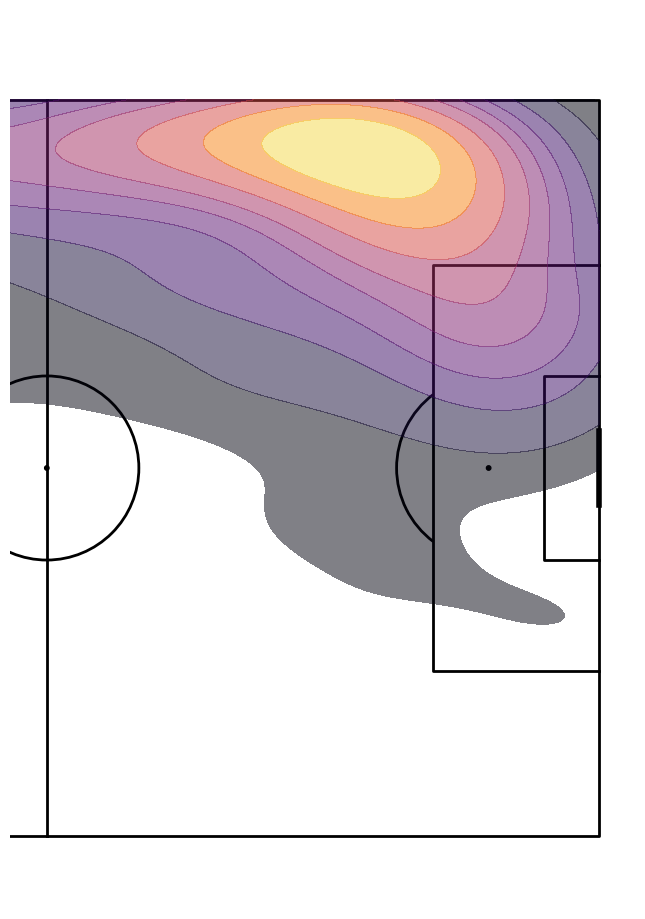

In [18]:
pitch = Pitch(line_color='black', half=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,endnote_height=0.04, title_space=0, endnote_space=0)
#Create the heatmap
pitch.kdeplot(
    x=gakpo_events['x'],
    y=gakpo_events['y'],
    fill = True,
    shade_lowest=False,
    alpha=.5,
    n_levels=10,
    cmap = 'inferno',
    ax=ax['pitch']
    )

plt.show()

In [19]:
shot_rows = gakpo_events[gakpo_events['type_name'] == 'Shot']

# Initialize a list to store the first possession row for each shot
first_possession_rows = []

# Iterate through each row in shot_rows
for idx, shot_row in shot_rows.iterrows():
    match_id = shot_row['match_id']
    possession_value = shot_row['possession']
    
    # Find the first row in the original dataframe with the same match_id and possession value
    first_possession_row = gakpo_events[(gakpo_events['match_id'] == match_id) & (gakpo_events['possession'] == possession_value)].iloc[0]
    
    # Append the found row to the list
    first_possession_rows.append(first_possession_row)

# Convert the list of rows back to a DataFrame
first_possession_df = pd.DataFrame(first_possession_rows)

# Show the resulting dataframe
first_possession_df.index


Index([ 6169,  6750,  8704, 10721, 12080, 12182, 12748, 13870, 16852, 16963,
       17808, 17822, 18365],
      dtype='int64')

In [20]:
# Concatenate the two DataFrames and sort by index
df_receipts_and_shots = pd.concat([first_possession_df, shot_rows]).sort_index()

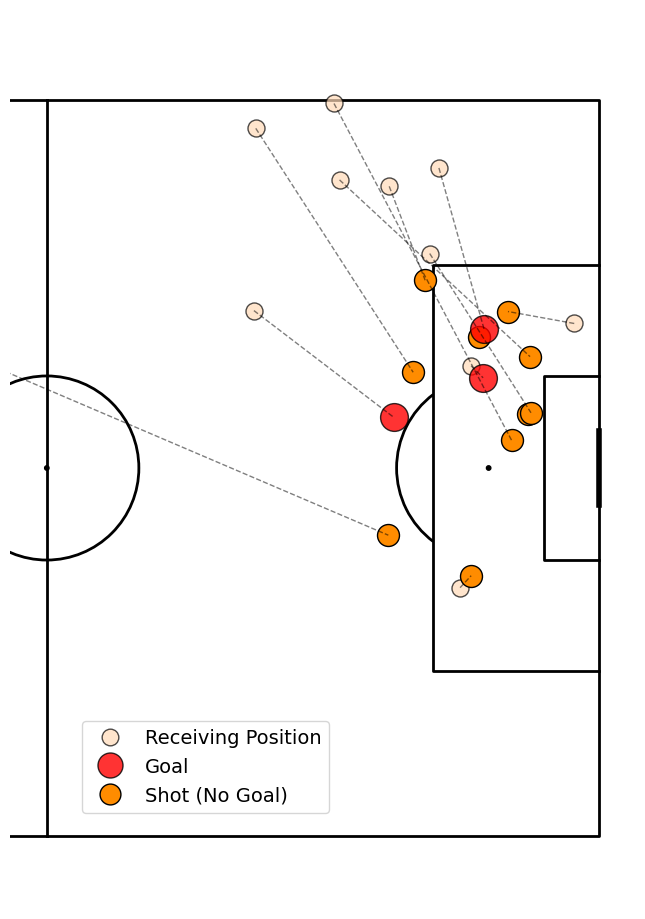

In [21]:
pitch = Pitch(line_color='black', half=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,endnote_height=0.04, title_space=0, endnote_space=0)

# Iterate through the dataframe in pairs: receiving and shooting rows
for i in range(0, len(df_receipts_and_shots), 2):  # Step of 2 to get pairs (receive, shoot)
    # Extract receiving and shooting rows
    receiving_row = df_receipts_and_shots.iloc[i]
    shooting_row = df_receipts_and_shots.iloc[i + 1]
    
    # Plot the dashed line connecting the receiving and shooting positions
    pitch.lines(receiving_row['x'], receiving_row['y'], 
                shooting_row['x'], shooting_row['y'], 
                ax=ax['pitch'], color='black', linestyle='--', lw=1, alpha=0.5)

    pitch.scatter(receiving_row['x'], receiving_row['y'], ax=ax['pitch'], color='peachpuff', s=150, edgecolor='black', alpha=0.7)

    # Plot the shot position, making the dot bigger if the shot resulted in a goal
    if shooting_row['outcome_name']=='Goal':  # Check if the shot was a goal
        pitch.scatter(shooting_row['x'], shooting_row['y'], ax=ax['pitch'], color='red', s=400, edgecolor='black', alpha=0.8)
    else:
        pitch.scatter(shooting_row['x'], shooting_row['y'], ax=ax['pitch'], color='darkorange', s=250, edgecolor='black', alpha=1)

# Create legend elements
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Receiving Position', markerfacecolor='peachpuff', markersize=12, markeredgecolor='black', alpha=0.7),
    Line2D([0], [0], marker='o', color='w', label='Goal', markerfacecolor='red', markersize=18, markeredgecolor='black', alpha=0.8),
    Line2D([0], [0], marker='o', color='w', label='Shot (No Goal)', markerfacecolor='darkorange', markersize=15, markeredgecolor='black')]
# Add legend to the plot
ax['pitch'].legend(handles=legend_elements, bbox_to_anchor=(0.1, 0.2), fontsize=14)


# Show the plot
plt.show()


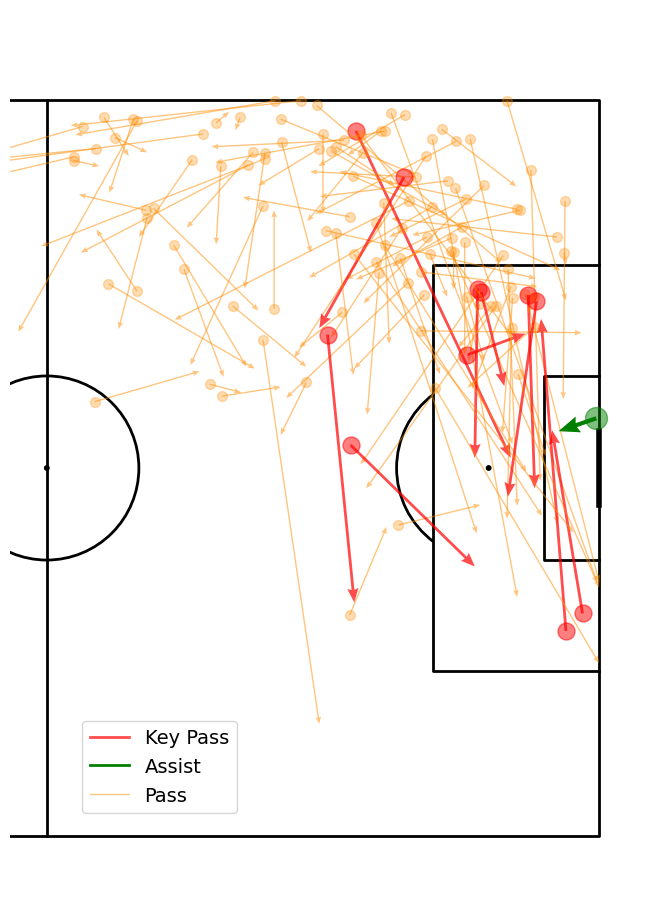

In [22]:

mask_cody = (gakpo_events.type_name == 'Pass') & (gakpo_events.x > 60)
df_pass = gakpo_events.loc[mask_cody, ['x', 'y', 'end_x', 'end_y', 'pass_shot_assist', 'pass_goal_assist']]

pitch = Pitch(line_color='black', half=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Plot arrows and points for each pass type
for i, row in df_pass.iterrows():
    if row["pass_shot_assist"] == True:
        pitch.arrows(row.x, row.y,
            row.end_x, row.end_y, color="red", ax=ax['pitch'], width=2, headwidth=4, headlength=5, alpha=0.7)
        pitch.scatter(row.x, row.y, alpha=0.5, s=150, color="red", ax=ax['pitch'])

    elif row["pass_goal_assist"] == True:
        pitch.arrows(row.x, row.y,
            row.end_x, row.end_y, color="green", ax=ax['pitch'], width=3, headwidth=4, headlength=5, alpha=1)
        pitch.scatter(row.x, row.y, alpha=0.5, s=250, color="green", ax=ax['pitch'])

    else:
        pitch.arrows(row.x, row.y,
                    row.end_x, row.end_y, color="darkorange", ax=ax['pitch'], width=1, headwidth=4, headlength=5, alpha=0.5)
        pitch.scatter(row.x, row.y, alpha=0.3, s=50, color="darkorange", ax=ax['pitch'])

# Create legend elements
shot_assist_legend = Line2D([0], [0], color='red', lw=2, label='Key Pass', alpha=0.7)
goal_assist_legend = Line2D([0], [0], color='green', lw=2, label='Assist')
regular_pass_legend = Line2D([0], [0], color='darkorange', lw=1, alpha=0.5, label='Pass')

# Add legend to the plot
ax['pitch'].legend(handles=[shot_assist_legend, goal_assist_legend, regular_pass_legend], 
                   bbox_to_anchor=(0.1, 0.2), fontsize=14)
plt.show()


# FROM LEFT TO RIGHT

In [23]:
gakpo_events.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'under_pressure',
       'outcome_id', 'outcome_name', 'counterpress', 'off_camera',
       'foul_committed_advantage', 'foul_won_advantage', 'technique_id',
       'technique_name', 'shot_statsbomb_xg', 'end_z',
       'goalkeeper_position_id', 'goalkeeper_position_name', 'aerial_won',
       'pass_cross', 'out', 'pass_assisted_shot_id', 'pass_shot_assist',
       'shot_key_pass_id', 'foul_committed_penalty', 'foul_committe

In [24]:
gakpo_events['play_pattern_name'].value_counts()

play_pattern_name
Regular Play      249
From Throw In     179
From Free Kick    100
From Goal Kick     47
From Corner        32
From Counter       18
From Kick Off      15
From Keeper        12
Name: count, dtype: int64

In [25]:
gakpo_events['type_name'].value_counts()

type_name
Ball Receipt      188
Carry             142
Pass              136
Pressure           74
Duel               14
Ball Recovery      13
Shot               13
Dribble            10
Block              10
Dribbled Past       9
Foul Won            9
Foul Committed      6
Dispossessed        6
Miscontrol          6
Clearance           6
Interception        4
50/50               3
Substitution        2
Offside             1
Name: count, dtype: int64

In [26]:
nico_events['type_name'].value_counts()

type_name
Ball Receipt       272
Carry              240
Pass               221
Pressure           107
Dribble             32
Ball Recovery       25
Block               12
Shot                12
Dispossessed        12
Foul Committed       9
Miscontrol           9
Dribbled Past        5
Duel                 5
Substitution         4
Foul Won             3
50/50                3
Injury Stoppage      2
Interception         1
Name: count, dtype: int64

In [27]:
print(nico_events['pass_shot_assist'].value_counts())
print(nico_events['pass_goal_assist'].value_counts())

pass_shot_assist
True    11
Name: count, dtype: int64
pass_goal_assist
True    1
Name: count, dtype: int64


In [28]:
nico_passes = nico_events['pass_shot_assist'].sum() + nico_events['pass_goal_assist'].sum()
gakpo_passes = gakpo_events['pass_shot_assist'].sum() + gakpo_events['pass_goal_assist'].sum()
foden_passes = foden_events['pass_shot_assist'].sum() + foden_events['pass_goal_assist'].sum()
mbappe_passes = mbappe_events['pass_shot_assist'].sum()+mbappe_events['pass_goal_assist'].sum()

print(nico_passes, gakpo_passes, foden_passes, mbappe_passes)


12 12 6 3


In [29]:
gakpo_shots = gakpo_events[gakpo_events['type_name']=='Shot'].shape[0]
nico_shots = nico_events[nico_events['type_name']=='Shot'].shape[0]
mbappe_shots = mbappe_events[mbappe_events['type_name']=='Shot'].shape[0]
foden_shots = foden_events[foden_events['type_name']=='Shot'].shape[0]

In [30]:
mbappe_time=464
nico_time=494
foden_time=622
gakpo_time=525

In [31]:
foden_shots_per_90 = foden_shots/(foden_time/90)
nico_shots_per_90 = nico_shots/(nico_time/90)
mbappe_shots_per_90 = mbappe_shots/(mbappe_time/90)
gakpo_shots_per_90 = gakpo_shots/(gakpo_time/90)

print(foden_shots_per_90, nico_shots_per_90, mbappe_shots_per_90, gakpo_shots_per_90)

1.8810289389067523 2.1862348178137654 4.655172413793103 2.2285714285714286


In [32]:
foden_passes_per_90 = foden_passes/(foden_time/90)
nico_passes_per_90 = nico_passes/(nico_time/90)
mbappe_passes_per_90 = mbappe_passes/(mbappe_time/90)
gakpo_passes_per_90 = gakpo_passes/(gakpo_time/90)

print(foden_passes_per_90, nico_passes_per_90, mbappe_passes_per_90, gakpo_passes_per_90)

0.8681672025723473 2.1862348178137654 0.5818965517241379 2.0571428571428574


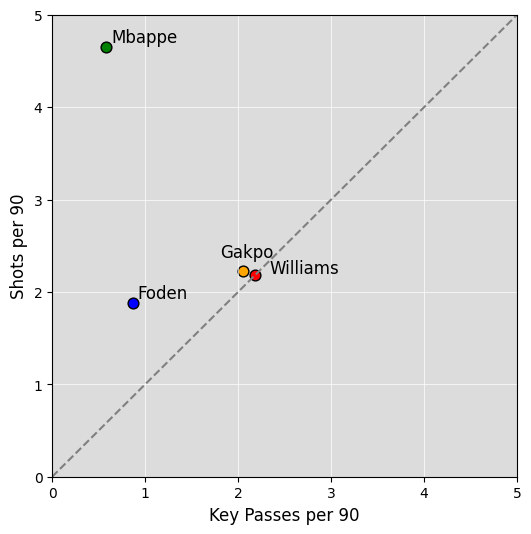

In [33]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Scatter plot for the players with their labels at the upper right of each point
ax.scatter([foden_passes_per_90], [foden_shots_per_90], color='blue', s=60, edgecolors='black')
ax.text(foden_passes_per_90 + 0.05, foden_shots_per_90 + 0.05, 'Foden', fontsize=12)

ax.scatter([nico_passes_per_90], [nico_shots_per_90], color='red', s=60, edgecolors='black')
ax.text(nico_passes_per_90 + 0.15, nico_shots_per_90 + 0.02, 'Williams', fontsize=12)

ax.scatter([mbappe_passes_per_90], [mbappe_shots_per_90], color='green', s=60, edgecolors='black')
ax.text(mbappe_passes_per_90 + 0.05, mbappe_shots_per_90 + 0.05, 'Mbappe', fontsize=12)

ax.scatter([gakpo_passes_per_90], [gakpo_shots_per_90], color='orange', s=60, edgecolors='black')
ax.text(gakpo_passes_per_90 -0.25, gakpo_shots_per_90 + 0.15, 'Gakpo', fontsize=12)

# Set equal range for both axes
ax.set_xlim(0, 5.0)  # Adjust range as necessary
ax.set_ylim(0, 5.0)  # Adjust range as necessary

# Create an identity line
x_values = np.linspace(0, 5, 100)
ax.plot(x_values, x_values, color='gray', linestyle='--')  # Dashed identity line

# Set background color and add white horizontal and vertical grid lines
ax.set_facecolor('gainsboro')
ax.grid(True, color='white', linestyle='-', linewidth=0.5)

# Add labels and title
ax.set_xlabel('Key Passes per 90', fontsize=12)
ax.set_ylabel('Shots per 90', fontsize=12)

# Remove the legend
# ax.legend()  # This line has been removed

# Show plot
plt.show()

In [34]:
total_xg_gakpo = gakpo_events['shot_statsbomb_xg'].sum()
total_xg_nico = nico_events['shot_statsbomb_xg'].sum()
total_xg_mbappe = mbappe_events['shot_statsbomb_xg'].sum()
total_xg_foden = foden_events['shot_statsbomb_xg'].sum()

In [35]:
foden_xg_per_90 = total_xg_foden/(foden_time/90)
nico_xg_per_90 = total_xg_nico/(nico_time/90)
mbappe_xg_per_90 = total_xg_mbappe/(mbappe_time/90)
gakpo_xg_per_90 = total_xg_gakpo/(gakpo_time/90)

In [36]:
print(foden_xg_per_90, nico_xg_per_90, mbappe_xg_per_90, gakpo_xg_per_90)   

0.11050785057877813 0.17281463675101214 0.486241903900862 0.1517041206857143


In [37]:
gakpo_events.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'under_pressure',
       'outcome_id', 'outcome_name', 'counterpress', 'off_camera',
       'foul_committed_advantage', 'foul_won_advantage', 'technique_id',
       'technique_name', 'shot_statsbomb_xg', 'end_z',
       'goalkeeper_position_id', 'goalkeeper_position_name', 'aerial_won',
       'pass_cross', 'out', 'pass_assisted_shot_id', 'pass_shot_assist',
       'shot_key_pass_id', 'foul_committed_penalty', 'foul_committe

In [38]:
gakpo_dribbles = gakpo_events[gakpo_events['type_name']=='Dribble']['outcome_name'].value_counts()
nico_dribbles = nico_events[nico_events['type_name']=='Dribble']['outcome_name'].value_counts()
foden_dribbles = foden_events[foden_events['type_name']=='Dribble']['outcome_name'].value_counts()
mbappe_dribbles = mbappe_events[mbappe_events['type_name']=='Dribble']['outcome_name'].value_counts()

In [39]:
percentage_gakpo = (gakpo_dribbles['Complete'] / gakpo_dribbles.sum()) * 100  # Calculate percentage
percentage_nico = (nico_dribbles['Complete'] / nico_dribbles.sum()) * 100  # Calculate percentage
percentage_foden = (foden_dribbles['Complete'] / foden_dribbles.sum()) * 100  # Calculate percentage
percentage_mbappe = (mbappe_dribbles['Complete'] / mbappe_dribbles.sum()) * 100  # Calculate percentage

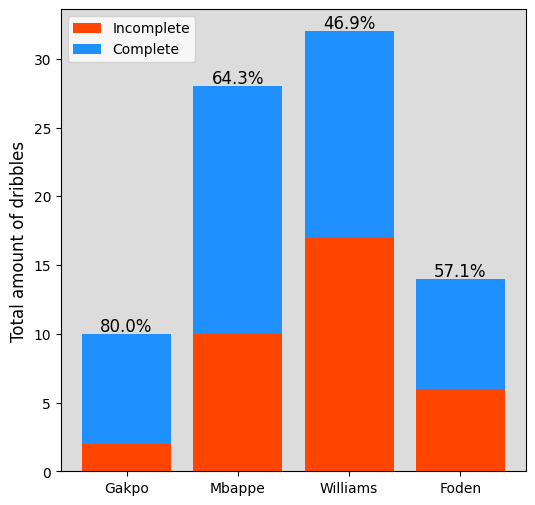

In [40]:
# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the bar chart

ax.bar(['Gakpo'], gakpo_dribbles['Incomplete'], label='Incomplete', color='orangered')
ax.bar(['Gakpo'], gakpo_dribbles['Complete'], bottom=gakpo_dribbles['Incomplete'], label='Complete', color='dodgerblue')
ax.text(0, gakpo_dribbles.sum() + 0.2, f'{percentage_gakpo:.1f}%', ha='center', fontsize=12)


ax.bar(['Mbappe'], mbappe_dribbles['Incomplete'], label='Incomplete', color='orangered')
ax.bar(['Mbappe'], mbappe_dribbles['Complete'], bottom=mbappe_dribbles['Incomplete'], label='Complete', color='dodgerblue')
ax.text(1, mbappe_dribbles.sum() + 0.2, f'{percentage_mbappe:.1f}%', ha='center', fontsize=12)


ax.bar(['Williams'], nico_dribbles['Incomplete'], label='Incomplete', color='orangered')
ax.bar(['Williams'], nico_dribbles['Complete'], bottom=nico_dribbles['Incomplete'], label='Complete', color='dodgerblue')
ax.text(2, nico_dribbles.sum() + 0.2, f'{percentage_nico:.1f}%', ha='center', fontsize=12)


ax.bar(['Foden'], foden_dribbles['Incomplete'], label='Incomplete', color='orangered')
ax.bar(['Foden'], foden_dribbles['Complete'], bottom=foden_dribbles['Incomplete'], label='Complete', color='dodgerblue')
ax.text(3, foden_dribbles.sum() + 0.2, f'{percentage_foden:.1f}%', ha='center', fontsize=12)


# Add labels and title
ax.set_ylabel('Total amount of dribbles', fontsize=12)
# Add a legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())
ax.set_facecolor('gainsboro')


# Show the plot
plt.show()

In [41]:
gakpo_events[gakpo_events['type_name']=='Shot']['outcome_name'].value_counts()
#sum 'Saved' and 'Goal' to get total shots on target 
gakpo_shots_on_target = gakpo_events[(gakpo_events['type_name']=='Shot') & (gakpo_events['outcome_name'].isin(['Saved', 'Goal']))].shape[0]
gakpo_shots_off_target = gakpo_events[(gakpo_events['type_name']=='Shot') & (~gakpo_events['outcome_name'].isin(['Saved', 'Goal']))].shape[0]
print(gakpo_shots_on_target, gakpo_shots_off_target)

8 5


In [42]:
mbappe_events[mbappe_events['type_name']=='Shot']['outcome_name'].value_counts()
mbappe_shots_on_target = mbappe_events[(mbappe_events['type_name']=='Shot') & (mbappe_events['outcome_name'].isin(['Saved', 'Goal']))].shape[0]
mbappe_shots_off_target = mbappe_events[(mbappe_events['type_name']=='Shot') & (~mbappe_events['outcome_name'].isin(['Saved', 'Goal']))].shape[0]
print(mbappe_shots_on_target, mbappe_shots_off_target)

9 15


In [43]:
nico_events[nico_events['type_name']=='Shot']['outcome_name'].value_counts()
nico_shots_on_target = nico_events[(nico_events['type_name']=='Shot') & (nico_events['outcome_name'].isin(['Saved', 'Goal']))].shape[0]
nico_shots_off_target = nico_events[(nico_events['type_name']=='Shot') & (~nico_events['outcome_name'].isin(['Saved', 'Goal']))].shape[0]
print(nico_shots_on_target, nico_shots_off_target)

3 9


In [44]:
foden_events[foden_events['type_name']=='Shot']['outcome_name'].value_counts()
foden_shots_on_target = foden_events[(foden_events['type_name']=='Shot') & (foden_events['outcome_name'].isin(['Saved', 'Goal']))].shape[0]
foden_shots_off_target = foden_events[(foden_events['type_name']=='Shot') & (~foden_events['outcome_name'].isin(['Saved', 'Goal']))].shape[0]
print(foden_shots_on_target, foden_shots_off_target)

5 8


In [45]:
#calculate percentage of shots on target
gakpo_shots_on_target_percentage = (gakpo_shots_on_target / gakpo_shots) * 100
mbappe_shots_on_target_percentage = (mbappe_shots_on_target / mbappe_shots) * 100
nico_shots_on_target_percentage = (nico_shots_on_target / nico_shots) * 100
foden_shots_on_target_percentage = (foden_shots_on_target / foden_shots) * 100

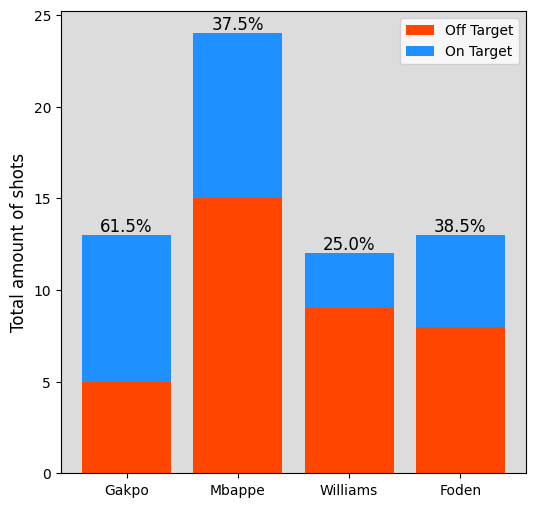

In [70]:
#do the stacked bar plot for shots on target and off target
fig, ax = plt.subplots(figsize=(6, 6))


ax.bar(['Gakpo'], gakpo_shots_off_target, label='Off Target', color='orangered')
ax.bar(['Gakpo'], gakpo_shots_on_target, bottom=gakpo_shots_off_target, label='On Target', color='dodgerblue')
ax.text(0, gakpo_shots + 0.2, f'{gakpo_shots_on_target_percentage:.1f}%', ha='center', fontsize=12)

ax.bar(['Mbappe'], mbappe_shots_off_target, label='Off Target', color='orangered')
ax.bar(['Mbappe'], mbappe_shots_on_target, bottom=mbappe_shots_off_target, label='On Target', color='dodgerblue')
ax.text(1, mbappe_shots + 0.2, f'{mbappe_shots_on_target_percentage:.1f}%', ha='center', fontsize=12)

ax.bar(['Williams'], nico_shots_off_target, label='Off Target', color='orangered')
ax.bar(['Williams'], nico_shots_on_target, bottom=nico_shots_off_target, label='On Target', color='dodgerblue')
ax.text(2, nico_shots + 0.2, f'{nico_shots_on_target_percentage:.1f}%', ha='center', fontsize=12)

ax.bar(['Foden'], foden_shots_off_target, label='Off Target', color='orangered')
ax.bar(['Foden'], foden_shots_on_target, bottom=foden_shots_off_target, label='On Target', color='dodgerblue')
ax.text(3, foden_shots + 0.2, f'{foden_shots_on_target_percentage:.1f}%', ha='center', fontsize=12)

# Add labels and title
ax.set_ylabel('Total amount of shots', fontsize=12)
# Add a legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())
ax.set_facecolor('gainsboro')

# Show the plot
plt.show()



In [ ]:
from scipy.stats import gaussian_kde

def clean_data(events):
    x = np.array(events['x'])
    y = np.array(events['y'])
    
    # Remove rows where x or y is NaN or inf
    valid_mask = np.isfinite(x) & np.isfinite(y)
    return {'x': x[valid_mask], 'y': y[valid_mask]}

# Clean the data for each player
gakpo_events = clean_data(gakpo_events)
foden_events = clean_data(foden_events)
nico_events = clean_data(nico_events)
mbappe_events = clean_data(mbappe_events)
